<a href="https://colab.research.google.com/github/JinaBobby/Rainfall-prediction-using-ml/blob/main/titanicipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1

The Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier

load downloaded datset

In [ ]:
Data= pd.read_csv("tested.csv")

In [ ]:
print(Data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
Data.shape

(418, 12)

In [ ]:
print(Data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


It shows the count of missing (null) values in each column.Here, 86 null values are found in column named Age,327 null values are found in coulmn named Cabin and 1 null value found in column named Fare.


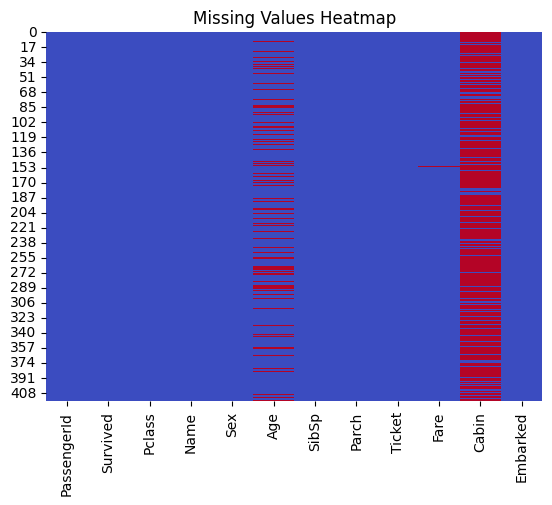

In [ ]:
from pickle import FALSE
sns.heatmap(Data.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()

It is a visual representation of the given dataset inorder to identify the column with most missing values , null values are shown as red colour.It is clear that column cabin contains more null values.

In [ ]:
Data.duplicated().sum()

np.int64(0)

In [ ]:
Data = Data.drop_duplicates()

In [ ]:
Data=Data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
print(Data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S


In [ ]:
Data['Age'] = Data['Age'].fillna(Data['Age'].median())

In [ ]:
Data['Fare'] = Data['Fare'].fillna(Data['Fare'].median())

for handling missing values , delete the unwanted columns and apply median value across the null values using fillna() fucntion.

In [ ]:
Data.columns = Data.columns.str.strip()

In [ ]:
le = LabelEncoder()
Data['Sex'] = le.fit_transform(Data['Sex'])
Data['Embarked'] = le.fit_transform(Data['Embarked'])

In [ ]:
print(Data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  34.5      0      0   7.8292         1
1         1       3    0  47.0      1      0   7.0000         2
2         0       2    1  62.0      0      0   9.6875         1
3         0       3    1  27.0      0      0   8.6625         2
4         1       3    0  22.0      1      1  12.2875         2


Categorical values are identified and changed into numerical values using LabelEncoder() function.

In [ ]:
features = Data.drop('Survived', axis=1)
target = Data['Survived']
'''
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
'''

In [ ]:
print(features)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    1  27.0      0      0    8.0500         2
414       1    0  39.0      0      0  108.9000         0
415       3    1  38.5      0      0    7.2500         2
416       3    1  27.0      0      0    8.0500         2
417       3    1  27.0      1      1   22.3583         0

[418 rows x 7 columns]


In [ ]:
print(target)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,stratify=target, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train)
print(y_train)

     Pclass  Sex    Age  SibSp  Parch     Fare  Embarked
163       3    1  27.00      0      0   7.0000         2
223       3    1  21.00      0      0   7.7958         2
183       3    1  27.00      0      0   7.7500         1
21        3    1   9.00      0      1   3.1708         2
111       3    0  27.00      0      0   7.7792         1
..      ...  ...    ...    ...    ...      ...       ...
58        3    1  27.00      1      0  16.1000         2
287       1    1  24.00      1      0  82.2667         2
307       3    1   0.83      0      1   9.3500         2
93        3    1  27.00      0      0   8.0500         2
228       3    1  40.50      0      0  15.1000         2

[334 rows x 7 columns]
163    0
223    0
183    0
21     0
111    1
      ..
58     0
287    0
307    0
93     0
228    0
Name: Survived, Length: 334, dtype: int64


Trying different models

1 Random Forest

2 logistic regression

3 DecisionTreeClassifier

4 GradientBoost

5 svm


In [ ]:
model1= RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model1, features, target, cv=4, scoring='f1')
model1.fit(X_train_scaled , y_train)
print("Cross-validated F1 scores:", scores)
print("Average F1:", scores.mean())

Cross-validated F1 scores: [1. 1. 1. 1.]
Average F1: 1.0


In [ ]:
y_pred1 = model1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1 Score:", f1_score(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.6309523809523809
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        53
           1       0.00      0.00      0.00        31

    accuracy                           0.63        84
   macro avg       0.32      0.50      0.39        84
weighted avg       0.40      0.63      0.49        84



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

Confusion Matrix:
[[53  0]
 [31  0]]


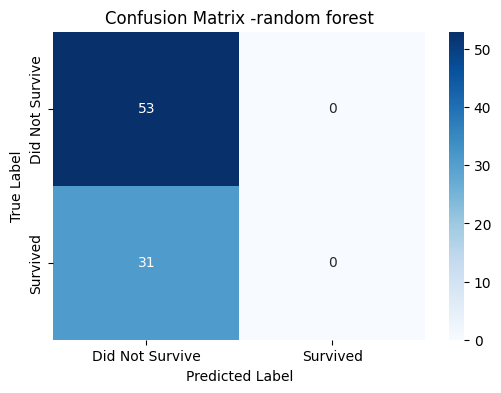

In [ ]:
cm1= confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(cm1)
plt.figure(figsize=(6,4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix -random forest')
plt.show()

In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
   27.0,
    0,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
 7.7792,   # Fare: 72 pounds/dollars
    1,      # Embarked: S

]

# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = model1.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger DID NOT SURVIVE.


but actually this passenger survived

In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
    47.0,
    1,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
    7.0000,   # Fare: 72 pounds/dollars
    2,      # Embarked: S

]

# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = model1.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")


The model predicts that this passenger DID NOT SURVIVE.


In [ ]:
model2=LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)
print(model2)

LogisticRegression(max_iter=1000)


In [ ]:
y_pred2 = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1 Score:", f1_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
   27.0,
    0,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
 7.7792,   # Fare: 72 pounds/dollars
    1,      # Embarked: S

]

# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = model2.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger SURVIVED.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
    47.0,
    1,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
    7.0000,   # Fare: 72 pounds/dollars
    2,      # Embarked: S

]
X_new = [example_passenger]
predicted_class = model2.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger SURVIVED.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    1,      # Sex: female
    27.0,
    0,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
    7.0000,   # Fare: 72 pounds/dollars
    2,      # Embarked: S

]
# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = model2.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger DID NOT SURVIVE.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[53  0]
 [ 0 31]]


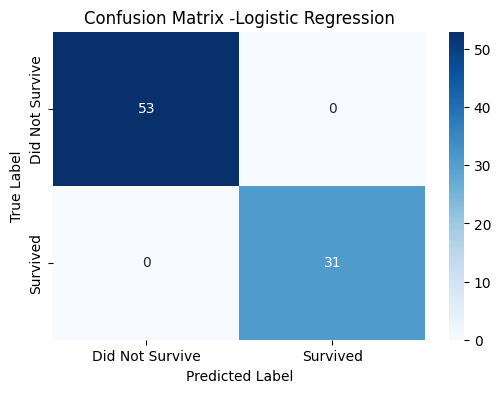

In [ ]:
cm2= confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm2)
plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix -Logistic Regression')
plt.show()

In [ ]:
model3 = DecisionTreeClassifier(max_depth=5,min_samples_split=10, min_samples_leaf=5,random_state=42)
model3.fit(X_train, y_train)
print(model3)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)


Cross-validated Accuracy scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Cross-validated F1 scores: [1. 1. 1. 1. 1.]
Mean CV F1 Score: 1.0000

Test Accuracy: 1.0000
Test F1 Score: 1.0000
Confusion Matrix:
[[53  0]
 [ 0 31]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



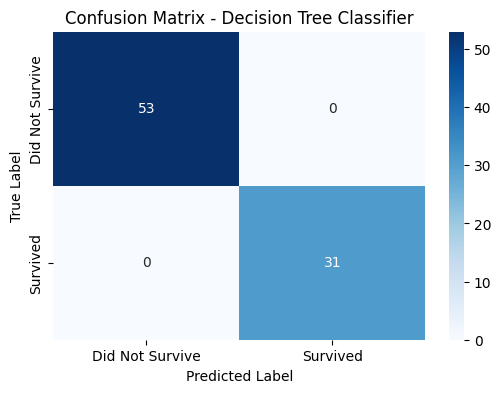

In [ ]:
cv_accuracy = cross_val_score(model3, X_train, y_train, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(model3, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-validated Accuracy scores: {cv_accuracy}")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Cross-validated F1 scores: {cv_f1}")
print(f"Mean CV F1 Score: {np.mean(cv_f1):.4f}")
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    1,      # Sex: female
    27.0,
    0,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
    7.0000,   # Fare: 72 pounds/dollars
    2,      # Embarked: S

]
# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = model3.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger DID NOT SURVIVE.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
    47.0,
    1,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
    7.0000,   # Fare: 72 pounds/dollars
    2,      # Embarked: S

]

# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = model3.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger SURVIVED.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


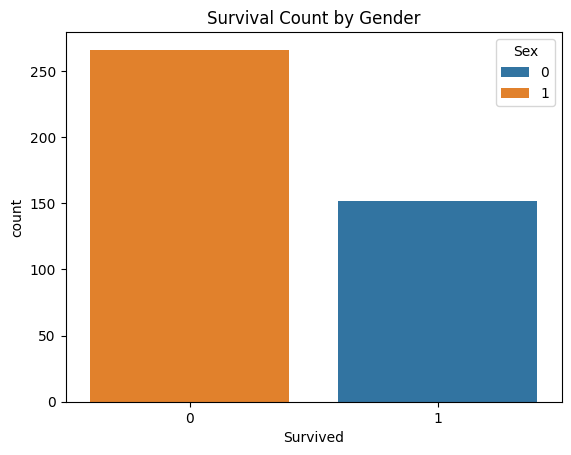

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=Data)
plt.title('Survival Count by Gender')
plt.show()

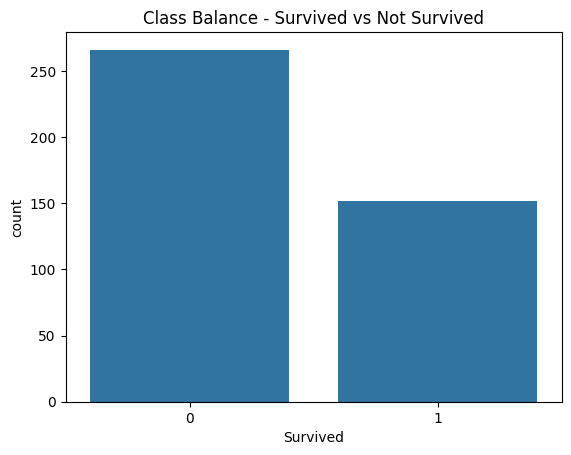

Survived
0    0.636364
1    0.363636
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='Survived', data=Data)
plt.title('Class Balance - Survived vs Not Survived')
plt.show()

survival_rate = Data['Survived'].value_counts(normalize=True)
print(survival_rate)

In [ ]:
print(features.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)

y_pred5 = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)[:,1]
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred5))

Gradient Boosting Classifier:
Accuracy: 1.0


In [ ]:
xample_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
   27.0,
    0,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
 7.7792,   # Fare: 72 pounds/dollars
    1,      # Embarked: S

]

# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class =gb.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger SURVIVED.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
    47.0,
    1,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
    7.0000,   # Fare: 72 pounds/dollars
    2,      # Embarked: S

]

# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = gb.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger SURVIVED.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    1,      # Sex: female
    27.0,
    0,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
    7.0000,   # Fare: 72 pounds/dollars
    2,      # Embarked: S

]
# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = gb.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger DID NOT SURVIVE.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[53  0]
 [ 0 31]]


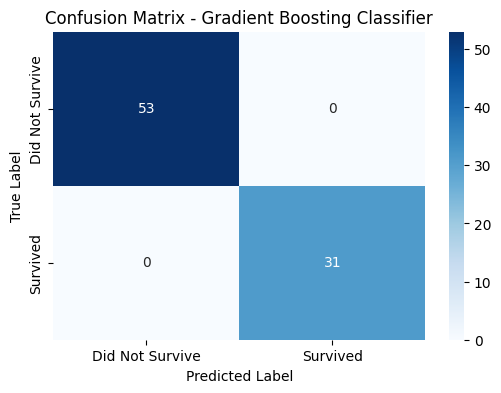

In [ ]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred5)

# Display matrix values
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()



In [ ]:
from sklearn.svm import SVC
svm = SVC(
    C=1.0,
    kernel='rbf',
    probability=True,
    random_state=42
)
svm.fit(X_train, y_train)

y_pred6 = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)[:,1]

print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Precision:", precision_score(y_test, y_pred6))
print("Recall:", recall_score(y_test, y_pred6))
print("F1 Score:", f1_score(y_test, y_pred6))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred6))
print("="*80)

Support Vector Machine:
Accuracy: 0.6190476190476191
Precision: 0.4
Recall: 0.06451612903225806
F1 Score: 0.1111111111111111
ROC AUC: 0.7181984175289106

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.94      0.76        53
           1       0.40      0.06      0.11        31

    accuracy                           0.62        84
   macro avg       0.52      0.50      0.43        84
weighted avg       0.55      0.62      0.52        84



Confusion Matrix:
[[50  3]
 [29  2]]


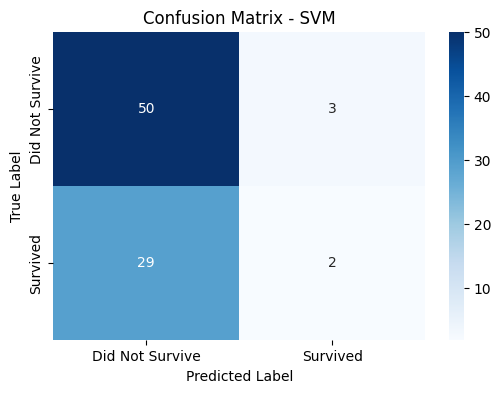

In [ ]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred6)

# Display matrix values
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
   27.0,
    0,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
 7.7792,   # Fare: 72 pounds/dollars
    1,      # Embarked: S

]

# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = svm.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger DID NOT SURVIVE.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


but actually the passenger survived

In [ ]:
example_passenger = [
    3,      # Pclass: 1st
    0,      # Sex: female
    47.0,
    1,      # SibSp: 0 siblings/spouses aboard
    0,      # Parch: 0 parents/children aboard
    7.0000,   # Fare: 72 pounds/dollars
    2,      # Embarked: S

]

# Reshape input for single sample prediction
X_new = [example_passenger]
predicted_class = svm.predict(X_new)

if predicted_class[0] == 1:
    print("The model predicts that this passenger SURVIVED.")
else:
    print("The model predicts that this passenger DID NOT SURVIVE.")

The model predicts that this passenger DID NOT SURVIVE.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**CONCLUSION**

**1 Logistic Regression:**  

Efficiency on Small Datasets: It requires fewer computational resources and is less prone to overfitting, making it suitable for smaller datasets.

**2 Decision tree:**

Pruning to Prevent Overfitting: With appropriate pruning, Decision Trees can generalize well without overfitting, even on small datasets.

**3 Gradient Boost:**

Handling Bias and Variance: It effectively balances bias and variance, making it robust to overfitting when properly tuned.
Performance on Small Datasets: Gradient Boosting often performs well on small to medium-sized datasets, especially when the data has complex patterns.

These 3 models performed well in accurate prediction

**1 svm:**

Complexity with Non-linear Kernels: While SVMs can handle non-linear relationships using kernels, selecting the appropriate kernel and tuning its parameters can be challenging, especially with limited data.

Overfitting on Small Datasets: With small datasets, SVMs may overfit, capturing noise instead of the underlying pattern.

**2 Random Forest:**

Overfitting with Small Data: Random Forests build multiple Decision Trees on bootstrapped samples. With small datasets, these samples can be very similar, leading to overfitting .

Lack of Interpretability: The ensemble nature of Random Forests makes them less interpretable compared to single Decision Trees or Logistic Regression